Text(0.5,1,'# of Each Income Class')

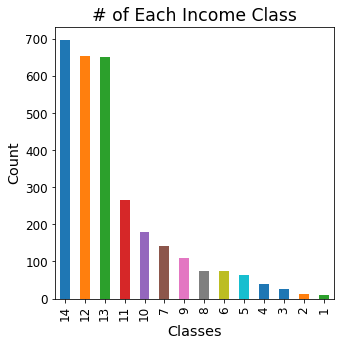

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

DATASET_PATH = os.path.join("..", "dataset")


def load_dataset(dataset_path=DATASET_PATH):
    rent_csv = os.path.join(dataset_path, "census-comp309ACTUAL.csv")
    df_ORIGINAL = pd.read_csv(rent_csv)
    df = df_ORIGINAL.replace('?', np.nan)
    train, test = pd.DataFrame(df.head(3000)), pd.DataFrame(df.tail(4621))
    train, test = train.iloc[:, 1:], test.iloc[:, 1:]
    train_x, train_y = train.iloc[:, :57], train.iloc[:, 57]
    test_x, test_y = test.iloc[:, :57], test.iloc[:, 57]
    x, y = df.iloc[:, 1:58], df.iloc[:, 58]
    
    return train, test,train_x, test_x, train_y, test_y, x, y, df_ORIGINAL


train, test, x_train, x_test, y_train, y_test, x,  y, df_ORIGINAL = load_dataset()
ax = y.value_counts().plot(kind="bar", figsize=(5,5), fontsize=12)
ax.set_xlabel(xlabel="Classes", size='x-large')
ax.set_ylabel(ylabel="Count", size='x-large')
ax.set_title(label="# of Each Income Class", size='xx-large')

In [17]:
from sklearn.preprocessing import Imputer
data_for_vis = train
imputer = Imputer(strategy="median")
data_for_vis = pd.DataFrame(imputer.fit_transform(data_for_vis), columns=train.columns.values)
corr_matrix = data_for_vis.corr()
corr_hhincome = corr_matrix["total_income_hhld_code"].sort_values(ascending=False)

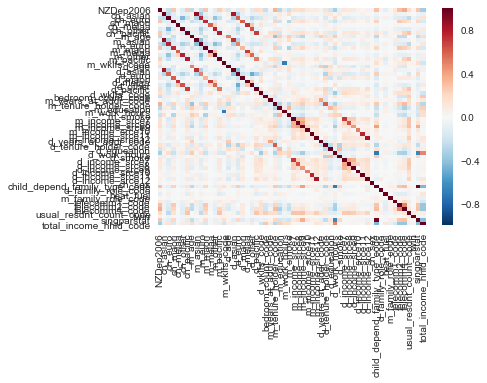

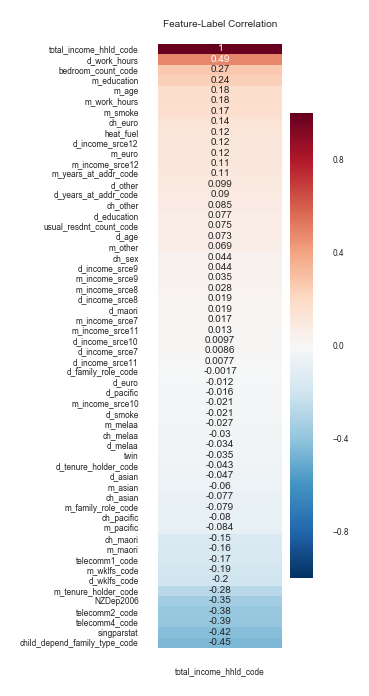

In [249]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as pyplot

sns.set(font_scale=0.4)
data_for_scatter = pd.DataFrame(data_for_vis[["m_age", "m_education", "m_work_hours", "m_wklfs_code", "m_smoke", "d_work_hours", "d_wklfs_code", "child_depend_family_type_code", "singparstat", "telecomm4_code", "telecomm2_code", "telecomm1_code", "NZDep2006", "m_tenure_holder_code", "bedroom_count_code", "total_income_hhld_code"]])
# scatter_matrix(data_for_scatter, figsize=(25,25))
corr = data_for_scatter.corr()
fig, ax = pyplot.subplots(figsize=(5, 4), dpi=100)
ax.set_title(label="Feature Interaction among the Top 15 Features")
# plot the heatmap
sns.heatmap(corr, ax=ax, annot=True)

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import Imputer

data_for_feature_import = x_train
imputer = Imputer(strategy="median")
data_for_feature_import = pd.DataFrame(imputer.fit_transform(data_for_feature_import), columns=x_train.columns.values)
data_for_feature_import, y_train_feature_import = shuffle(data_for_feature_import, y_train, random_state=42)

clf = RandomForestClassifier(n_estimators=250)
clf.fit(data_for_feature_import, y_train_feature_import)
sorted_feat_importance = pd.Series(clf.feature_importances_, index=x_train.columns.values)
sorted_feat_importance = sorted_feat_importance.sort_values()

In [113]:
temp = sorted_feat_importance[sorted_feat_importance >= 0.005]
temp

m_asian                          0.005715
m_pacific                        0.006097
m_income_srce9                   0.006662
ch_asian                         0.006838
d_other                          0.007195
m_other                          0.007208
singparstat                      0.007231
ch_other                         0.007434
m_income_srce12                  0.007458
child_depend_family_type_code    0.008186
ch_pacific                       0.008640
d_wklfs_code                     0.009188
d_maori                          0.009374
telecomm2_code                   0.009852
d_tenure_holder_code             0.011743
d_euro                           0.012105
m_maori                          0.012232
m_euro                           0.014010
ch_euro                          0.014379
ch_maori                         0.014786
m_tenure_holder_code             0.014858
telecomm1_code                   0.015238
telecomm4_code                   0.017730
d_smoke                          0

<Figure size 1600x1100 with 0 Axes>

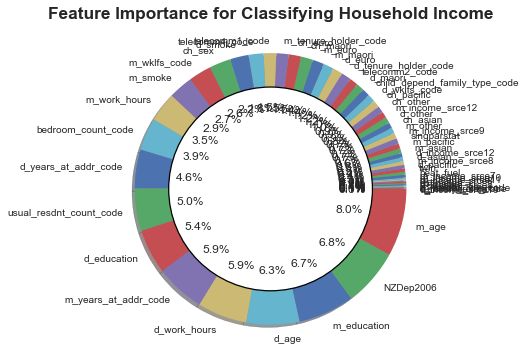

<Figure size 1600x1100 with 0 Axes>

In [236]:
# The slices will be ordered and plotted counter-clockwise.
labels = sorted_feat_importance.index
features = sorted_feat_importance.values
explode = (0, 0, 0, 0)  # explode a slice if required
sns.set(font_scale=1)

plt.pie(features, labels=labels,
        autopct='%1.1f%%', shadow=True)
plt.title("Feature Importance for Classifying Household Income", size='x-large', fontweight='bold', position=(.5, 1.05))
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.figure(dpi=200)
# Set aspect ratio to be equal so that pie is drawn as a circle.
# plt.show() 

In [114]:
num_attr = ["m_age", "d_age", "bedroom_count_code", "m_years_at_addr_code", "m_work_hours", "d_years_at_addr_code", "d_work_hours", "usual_resdnt_count_code"]
cat_attr = ["NZDep2006", 'ch_asian', 'ch_euro', 'ch_maori', 'ch_melaa', 'ch_other',
        'ch_pacific', 'ch_sex', 'child_depend_family_type_code', 'd_asian',
        'd_education', 'd_euro', 'd_family_role_code', 'd_income_srce10',
        'd_income_srce11', 'd_income_srce12', 'd_income_srce7',
        'd_income_srce8', 'd_income_srce9', 'd_maori', 'd_melaa', 'd_other',
        'd_pacific', 'd_smoke', 'd_tenure_holder_code', 'd_wklfs_code',
        'heat_fuel', 'm_asian', 'm_education', 'm_euro', 'm_family_role_code',
        'm_income_srce10', 'm_income_srce11', 'm_income_srce12',
        'm_income_srce7', 'm_income_srce8', 'm_income_srce9', 'm_maori',
        'm_melaa', 'm_other', 'm_pacific', 'm_smoke', 'm_tenure_holder_code',
        'm_wklfs_code', 'singparstat', 'telecomm1_code',
        'telecomm2_code', 'telecomm4_code', 'twin']
num_attr_temp = ["m_age", "d_age", "bedroom_count_code", "m_years_at_addr_code", "m_work_hours", "d_years_at_addr_code", "usual_resdnt_count_code"]

cat_attr_temp = ['m_asian', 'm_pacific', 'm_income_srce9', 'ch_asian', 'd_other',
       'm_other', 'singparstat', 'ch_other', 'm_income_srce12',
       'child_depend_family_type_code', 'ch_pacific', 'd_wklfs_code',
       'd_maori', 'telecomm2_code', 'd_tenure_holder_code', 'd_euro',
       'm_maori', 'm_euro', 'ch_euro', 'ch_maori', 'm_tenure_holder_code',
       'telecomm1_code', 'telecomm4_code', 'd_smoke', 'ch_sex',
       'm_smoke', 'd_education',
       'd_work_hours', 'm_education', 'NZDep2006']

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.preprocessing import Imputer, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from prince import MCA

num_pipeline = Pipeline([
        ('selector',
    DataFrameSelector(num_attr)),
        ('imputer',
    Imputer(strategy="median")),
        ('std_scaler',
    MinMaxScaler()),
        ('pca',
    PCA(n_components=0.95))
])

cat_pipeline = Pipeline([
        ('selector',
    DataFrameSelector(cat_attr)),
        ('imputer',
    Imputer(strategy="median")),
        ('mca',
    MCA(n_components=30))
])

In [117]:
from sklearn.pipeline import FeatureUnion

full_pipeline = Pipeline([
        ('feature_union',
    FeatureUnion(transformer_list=[
    ("cat_pipeline", cat_pipeline),
    ("num_pipeline", num_pipeline),
    ]))
])

In [118]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

x_train_prepared = x
y_train_prepared = y_train
indices = np.array(cat_attr + num_attr)

full_pipeline.fit(x_train_prepared)
x_train_prepared = full_pipeline.transform(x_train_prepared)
x_train_prepared = pd.DataFrame(x_train_prepared).head(3000)

# feature_selector = SelectFromModel(ExtraTreesClassifier(n_estimators=250,random_state=0)).fit(x_train_prepared, y_train_prepared)
# x_train_prepared = feature_selector.transform(x_train_prepared)
# smote = SMOTE()  # under sampler
# renn = RepeatedEditedNearestNeighbours()
# smote.fit(x_train_prepared, y_train_prepared)
# x_train_prepared, y_train_prepared = smote.sample(x_train_prepared, y_train_prepared)
# renn.fit(x_train_prepared, y_train_prepared)
# x_train_prepared, y_train_prepared = renn.sample(x_train_prepared, y_train_prepared)
# pd.DataFrame(train_prepared, columns=indices[feature_selector.get_support(indices=True)])
# feature_selector.get_support(indices=True)
# sorted(zip(feature_selector.get_support(), indices))
unique, counts = np.unique(y_train_prepared, return_counts=True)

x_train_prepared, y_train_prepared = shuffle(x_train_prepared, y_train_prepared, random_state=42)
print(x_train_prepared.shape, y_train_prepared.shape)

# X_train, X_test, y_train, y_test = train_test_split(x_train_prepared, y_train_prepared, stratify=y_train_prepared, test_size=0.2) 
# df = pd.DataFrame(X_train)
# df.to_csv("train_data.csv", header=None, index=None)

# df = pd.DataFrame(X_test)
# df.to_csv("test_data.csv", header=None, index=None)

# df = pd.DataFrame(y_train)
# df.to_csv("train_labels.csv", header=None, index=None)

# df = pd.DataFrame(y_test)
# df.to_csv("test_labels.csv", header=None, index=None)

# print(np.asarray((unique, counts)).T)
# pd.DataFrame(x_train_prepared)

(3000, 36) (3000,)


In [119]:
test_prepared = full_pipeline.transform(x)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
classifiers = [
    KNeighborsClassifier(),  # prom
    DecisionTreeClassifier(),
    GaussianNB(),
    MLPClassifier(),
    RandomForestClassifier(),  #prom
    AdaBoostClassifier(),
    SVC(),  #prom
    LinearSVC(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    QDA()
]

In [122]:
from sklearn.model_selection import cross_val_score

best = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='invscaling',
       learning_rate_init=0.0001, max_iter=2400, momentum=0.7,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

cross_val_score(best, x_train_prepared, y_train_prepared, cv=5, scoring='accuracy')


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.27768595, 0.30845771, 0.28618968, 0.3361204 , 0.3153457 ])

In [121]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
import random


clf = classifiers[3]
param_dist_rfc = {"max_depth": [17, None],
                  "n_estimators": sp_randint(100,200),
              "max_features": sp_randint(1, 17),
              "min_samples_split": sp_randint(2, 17),
              "min_samples_leaf": sp_randint(1, 17),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
#             max_depth=None, max_features=13, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=12, min_samples_split=3,
#             min_weight_fraction_leaf=0.0, n_estimators=33, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=42, max_features=9, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=2, min_samples_split=35,
#             min_weight_fraction_leaf=0.0, n_estimators=155, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

param_dist_knn = {"n_neighbors": sp_randint(2, 100),
              "algorithm": ['ball_tree', 'kd_tree', 'brute'],
              "leaf_size": sp_randint(10, 100),
              "p": [1, 2, 3],}
# KNeighborsClassifier(algorithm='ball_tree', leaf_size=48, metric='minkowski',
#            metric_params=None, n_jobs=1, n_neighbors=10, p=3,
#            weights='uniform')

param_dist_mlp = {"hidden_layer_sizes": [(50, 50)],
                 "activation": ['relu'],
                 "learning_rate": ['invscaling'],
                  "solver": ["adam"],
                 "learning_rate_init": [0.0001],
                 "max_iter": sp_randint(400, 800),
                 "momentum": [0.7, 0.8, 0.9],
                 }
# MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#        beta_2=0.999, early_stopping=False, epsilon=1e-08,
#        hidden_layer_sizes=(50, 50), learning_rate='invscaling',
#        learning_rate_init=0.0001, max_iter=800, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=None,
#        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
#        verbose=False, warm_start=False)

n_iter_search = 100
random_search = RandomizedSearchCV(clf, n_iter=n_iter_search, param_distributions=param_dist_mlp)
random_search.fit(x_train_prepared, y_train_prepared)
best = random_search.best_estimator_
best

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (779) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (468) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (468) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\ne

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (414) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (414) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (583) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (583) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\ne

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (612) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\ne

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (640) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\ne

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\ne

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='invscaling',
       learning_rate_init=0.0001, max_iter=572, momentum=0.7,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [123]:
best.fit(x_train_prepared, y_train_prepared)
results = best.predict(test_prepared)
results

array(['13', '7', '14', ..., '13', '13', '13'], dtype='<U2')

In [124]:
df = pd.DataFrame(results)
df.to_csv("results.csv")
df_ORIGINAL["total_income_hhld_code"] = results
result_df = pd.DataFrame(df_ORIGINAL[["random_ID", "total_income_hhld_code"]])
result_df.to_csv("results.csv", index=False)

In [66]:
data_for_feature_import = x_train
imputer = Imputer(strategy="median")
data_for_feature_import = pd.DataFrame(imputer.fit_transform(data_for_feature_import), columns=x_train.columns.values)

pca = PCA()
pca.fit(data_for_feature_import)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.50353119, 0.71431142, 0.83668754, 0.92249115, 0.97081138,
       0.98081786, 0.98543574, 0.98900254, 0.9920751 , 0.99426097,
       0.99579291, 0.9972022 , 0.99844336, 0.99891406, 0.99907153,
       0.99920517, 0.99932428, 0.9994211 , 0.99950335, 0.99956178,
       0.99961472, 0.99966589, 0.99971587, 0.99975802, 0.99979972,
       0.99983131, 0.99985568, 0.99987153, 0.99988621, 0.99989886,
       0.99991029, 0.99992045, 0.99992916, 0.9999366 , 0.99994326,
       0.99994975, 0.99995547, 0.99996084, 0.99996549, 0.99996998,
       0.999974  , 0.9999772 , 0.99998022, 0.99998286, 0.99998531,
       0.99998755, 0.99998964, 0.9999916 , 0.99999321, 0.99999471,
       0.99999608, 0.99999715, 0.99999797, 0.99999875, 0.99999923,
       0.99999966, 1.        ])

In [69]:
random_search.best_params_

{'momentum': 0.6,
 'max_iter': 400,
 'learning_rate_init': 0.0001,
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (100, 100),
 'activation': 'relu'}